In [11]:
import gc
import os
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
from glob import glob
import matplotlib.pyplot as plt
from types import SimpleNamespace
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
pd.options.display.max_colwidth = 1000
pd.options.display.max_rows = 500

In [2]:
glob("output/roberta-large/*")

['output/roberta-large/predictions.npy',
 'output/roberta-large/oof.npy',
 'output/roberta-large/oof.csv']

In [3]:
oof = pd.read_csv("output/roberta-large/oof.csv")
print(oof.shape)
oof.head(1)

(8720, 9)


,text_id,text,synset_id,synset_word,text_truncated,synset_index,fold,pred_synset_index,pred_synset_id
0,t0000000001,оны долдугаар сарын#0000000001 13.,43,сар,оны долдугаар сарын#0000000001 13.,42,4,42,43


<AxesSubplot:xlabel='count', ylabel='synset_word'>

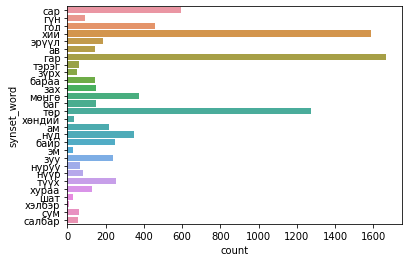

In [13]:
sns.countplot(y = oof.synset_word)

In [52]:
wrong_preds = oof.query("synset_id != pred_synset_id")
# wrong_preds

In [53]:
wrong_preds.synset_word.value_counts()

гар       87
гол       32
мөнгө     27
ам        27
байр      26
хураа     24
хий       20
зах       14
түүх      12
сум       12
тэрэг     11
зүрх      10
гүн       10
зуу        7
нуруу      7
төр        6
бараа      6
салбар     5
нүүр       5
хэлбэр     5
шат        4
нүд        4
эм         3
ав         3
хөндий     3
эрүүл      2
баг        2
сар        1
Name: synset_word, dtype: int64

In [19]:
8700 * 5 / 100

435.0

In [17]:
oof_gar = oof.query("synset_word == 'гар'")
print(np.unique(oof_gar.pred_synset_id.values))
confusion_matrix(oof_gar.synset_id.values, oof_gar.pred_synset_id.values)

[14 16 17 18 20 25 26 48 54]


array([[   0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1, 1239,    2,    7,    1,    1,    1,    1,    0],
       [   0,    1,  331,    0,    0,    0,    0,    0,    1],
       [   0,   71,    0,   10,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0]])

In [ ]:
meaning

preprocessing хийвэл сайжрах жишээ

- [ ] Нийлсэн байгаа үгнүүдйиг салгах
    ```
    Ганц бие хүмүүсийн дунд судалгаа хийхэдгар#0000002430 утасны олон талт үйлчилгээ зарим тохиолдолд ганцаардлыг нөхдөг гэсэн сонирхолтой дүгнэлтийг гаргасан байдаг
    ```
- [ ] 

In [41]:
oof_gar.query("synset_id == pred_synset_id and synset_id == 18")

,text_id,text,synset_id,synset_word,text_truncated,synset_index,fold,pred_synset_index,pred_synset_id
1763,t0000001764,"Чухам МАХНын аппаратын оройд гарч#0000001764 чадвал, ард түмний оройд гарлаа гэсэн үг болохыг тэр үед олон хүн харсан ч цөөхөн нь чаджээ",18,гар,"Чухам МАХНын аппаратын оройд гарч#0000001764 чадвал, ард түмний оройд гарлаа гэсэн үг болохыг тэр үед олон хүн харсан ч цөөхөн",17,0,17,18
1764,t0000001765,"Чухам МАХНын аппаратын оройд гарччадвал, ард түмний оройд гарлаа#0000001765 гэсэн үг болохыг тэр үед олон хүн харсан ч цөөхөн нь чаджээ",18,гар,"Чухам МАХНын аппаратын оройд гарччадвал, ард түмний оройд гарлаа#0000001765 гэсэн үг болохыг тэр үед олон хүн харсан ч цөөхөн нь чаджээ",17,3,17,18
1796,t0000001797,"Хорь, гучин жил үйлээ үзэж, ёстой л шар махтайгаа хатаж байж арай гэж нэг шинэ сорт гаргаж#0000001797 авдаг болохоор хэн хүн барьж аваад хийчихдэггүй",18,гар,"гучин жил үйлээ үзэж, ёстой л шар махтайгаа хатаж байж арай гэж нэг шинэ сорт гаргаж#0000001797 авдаг болохоор хэн хүн барьж аваад хийчихдэггүй",17,1,17,18
1804,t0000001805,"Үүнээс цааших жилүүдэд мөн л ажиглалт, судалгааны ажлууд хийгдэхбөгөөд жилийн дараа л шинэ сорт гарах#0000001805 боломжтой",18,гар,"Үүнээс цааших жилүүдэд мөн л ажиглалт, судалгааны ажлууд хийгдэхбөгөөд жилийн дараа л шинэ сорт гарах#0000001805 боломжтой",17,0,17,18
2120,t0000002121,"Ой, модны аж үйлдвэрийн салбарт ойн баялгийг арчлан хамгаалах, зөв зохистой ашиглах тухай хууль тогтоомжийн заалтыг цөөнгүй зөрчиж байгаагаа төлөвлөгөө биелүүлэх явцад зайлшгүй тийм хохирол, зөрчил гарч#0000002121 байх юм шиг өрөөсгөлөөр ойлгож, тууштай тэмцэл хийхгүй байна",18,гар,"ашиглах тухай хууль тогтоомжийн заалтыг цөөнгүй зөрчиж байгаагаа төлөвлөгөө биелүүлэх явцад зайлшгүй тийм хохирол, зөрчил гарч#0000002121 байх юм шиг өрөөсгөлөөр ойлгож, тууштай тэмцэл хийхгүй байна",17,1,17,18
3275,t0000003276,.Зөрчил гаргасан#0000003276 этгээд түүнд ногдуулсан захиргааны шийтгэлийн арга хэмжээг нэн даруй биелүүлнэ.,18,гар,.Зөрчил гаргасан#0000003276 этгээд түүнд ногдуулсан захиргааны шийтгэлийн арга хэмжээг нэн даруй биелүүлнэ.,17,0,17,18
4542,t0000004543,Нүүрстөрөгчжүүлэх ба хийжүүлэх гэсэн хоёр арга хэрэглэн нүүрснээс хийнтүлш гарган#0000004543 авч байв,18,гар,Нүүрстөрөгчжүүлэх ба хийжүүлэх гэсэн хоёр арга хэрэглэн нүүрснээс хийнтүлш гарган#0000004543 авч байв,17,1,17,18
4546,t0000004547,"Ийм учраас энэ зууныилүү үр ашигтай түлшийг нүүрснээс гарган#0000004547 авч ашиглах болно гэдэгтэй дэлхий нийт санал нэг байгаа нь түүний нөөц, үнэ өртөгтэй холбоотой",18,гар,"Ийм учраас энэ зууныилүү үр ашигтай түлшийг нүүрснээс гарган#0000004547 авч ашиглах болно гэдэгтэй дэлхий нийт санал нэг байгаа нь түүний нөөц, үнэ өртөгтэй холбоотой",17,1,17,18
5355,t0000005356,".Торгуулийн хуудас, шийтгэвэрт зөрчил хэлэлцсэн он, сар,өдөр, шийдвэр гаргасаналбан тушаалтны нэр, эрхэлсэн ажил, зөрчил хянан хэлэлцэх үед тогтоогдсон нөхцөл байдал, хариуцлага хүлээлгэх хууль тогтоомжийн холбогдох заалт, гаргасаншийдвэрийг заана.Торгуулийн хуудас, шийтгэврийн нэг хувийг зөрчил гаргасан#0000005356 этгээдэд өгнө",18,гар,"нөхцөл байдал, хариуцлага хүлээлгэх хууль тогтоомжийн холбогдох заалт, гаргасаншийдвэрийг заана.Торгуулийн хуудас, шийтгэврийн нэг хувийг зөрчил гаргасан#0000005356 этгээдэд өгнө",17,2,17,18
6571,t0000006572,"Нүүрснээс хийнтүлш гарган#0000006572 авах арга, технологийг Герман, Франц улсын эрдэмтэн, зохион бүтээгчид одоогоос 200 гаруй жилийн өмнөөс судалж эхэлсэн түүхтэй.",18,гар,"Нүүрснээс хийнтүлш гарган#0000006572 авах арга, технологийг Герман, Франц улсын эрдэмтэн, зохион бүтээгчид одоогоос 200 гаруй жилийн өмнөөс судалж",17,4,17,18


In [12]:
wrong_preds.query("synset_word == 'гар'")

,text_id,text,synset_id,synset_word,text_truncated,synset_index,fold,pred_synset_index,pred_synset_id
14,t0000000015,"Зөвхөн уран зохиолын төлөө ""элэг зүрхурагдсандаа л"" дээрх үгсийг зориг гарган#0000000015 өгүүлсэн юм шүү? Ёстой нөгөө ""аяаяааааяа"" гэдэг шиг хожмын үр сад минь хүн төрөлхтний иргэншил оюун санааны ийм түвшинд хүрчихсэн байхад монгол зохиолчид ерөөл, магтаал мэтийн тийм юм бичиж байсан гэдгийг олж мэдээд толгойгоо яаж сэгсрэхийг би төсөөлж байна",18,гар,"Зөвхөн уран зохиолын төлөө ""элэг зүрхурагдсандаа л"" дээрх үгсийг зориг гарган#0000000015 өгүүлсэн юм шүү? Ёстой нөгөө ""аяаяааааяа"" гэдэг шиг хожмын үр сад минь хүн төрөлхтний иргэншил",17,4,15,16
32,t0000000033,"Шинэ намууд дөнгөж байгуулагдаад сонгуульд оролцож байгаа нь хуульд нийцсэн явдал мөн үү? Үндсэн хуулийн Цэцээр саяхан Улс төрийннам байгуулагдаад сар болж байж бүх шатны сонгуульд оролцож болно гэсэн заалт Монгол Улсын Үндсэн хуулийн дугаар зүйлийн дэх хэсгийн ""Төрийнбайгууллагад сонгох сонгогдох эрхтэй"" гэсэн заалтыг зөрчиж байна гэсэн дүгнэлт гаргасан#0000000033",18,гар,"хуулийн дугаар зүйлийн дэх хэсгийн ""Төрийнбайгууллагад сонгох сонгогдох эрхтэй"" гэсэн заалтыг зөрчиж байна гэсэн дүгнэлт гаргасан#0000000033",17,0,15,16
300,t0000000301,Автобус явсаар гаруй метрийн өндөр тагийн бүсэд гарч#0000000301 ирлээ,18,гар,Автобус явсаар гаруй метрийн өндөр тагийн бүсэд гарч#0000000301 ирлээ,17,2,15,16
361,t0000000362,Нийслэлээс Зайсан руу гардаг#0000000362 гол замыг хаалаа,16,гар,Нийслэлээс Зайсан руу гардаг#0000000362 гол замыг хаалаа,15,1,17,18
489,t0000000490,Явсаар нурууныорой дээр гарч#0000000490 ирлээ,18,гар,Явсаар нурууныорой дээр гарч#0000000490 ирлээ,17,4,15,16
543,t0000000544,Ялангуяа Авлигатай тэмцэх байгууллага зүгээр л хуулийнхаа хүрээнд ажиллаж эхлэхэд л Монгол Улсад луйварчингууд төрдгардаг#0000000544 зам шууд хаагдана,18,гар,Ялангуяа Авлигатай тэмцэх байгууллага зүгээр л хуулийнхаа хүрээнд ажиллаж эхлэхэд л Монгол Улсад луйварчингууд төрдгардаг#0000000544 зам шууд хаагдана,17,1,15,16
634,t0000000635,"..Энэ хуулийн .; .; .; .; .; .т заасан журмыг зөрчиж үйлдвэрлэсэн буюу импортолсон, эсхүл хяналтын шинжилгээ хийлгээгүйсогтууруулах ундааг худалдаа, үйлчилгээнд гаргахыг#0000000635 хориглоно",18,гар,".; .т заасан журмыг зөрчиж үйлдвэрлэсэн буюу импортолсон, эсхүл хяналтын шинжилгээ хийлгээгүйсогтууруулах ундааг худалдаа, үйлчилгээнд гаргахыг#0000000635 хориглоно",17,4,15,16
693,t0000000694,"Далан гуравны жил нь орж байгаа, нэрд гарсан#0000000694 энэ эрдэмтэн, ардын эмч гэдэг хүндтэй цол авсан жилээ ийнхүү ноцтой хэрэгт холбогдсон нь Монголын улаан, хөх, шар сонины олз, идэш болж, бах тавы нь хангаж, мянга мянгаараа боорлож албан газар автобусны зогсоол, айл гэрт, ""Ардын эмч, ардын амийг хорлолоо"" гэсэн тэргүүн өгүүллийг хөгшин залуугүй гар дамжуулан уншиж, бие биенээ сөргөсөн хэрүүлийн алим хэдхэн хоногийн дотор Монголын газар, тэнгэрийг доргиож эхлэв.",18,гар,"Далан гуравны жил нь орж байгаа, нэрд гарсан#0000000694 энэ эрдэмтэн, ардын эмч гэдэг хүндтэй цол авсан жилээ ийнхүү ноцтой хэрэгт холбогдсон нь Монголын",17,1,15,16
733,t0000000734,Саяхан бид Африкийн барнаас хувилах аргаар хулгана гаргаж#0000000734 авсан,18,гар,Саяхан бид Африкийн барнаас хувилах аргаар хулгана гаргаж#0000000734 авсан,17,0,15,16
769,t0000000770,"Тэр, ХөхӨндрийн бараахарагдах хэц, нэгэн гүвээ даван замдаа бэлчиж байсан баахан адууг хөөн өчигдөр хониныхоо бэлчиж байсан гүвээн дээр гарч#0000000770 ирлээ",18,гар,нэгэн гүвээ даван замдаа бэлчиж байсан баахан адууг хөөн өчигдөр хониныхоо бэлчиж байсан гүвээн дээр гарч#0000000770 ирлээ,17,3,15,16


In [64]:
# 1386	t0000001387	Ээж ачааны тэн өргөж тэмээний нуруундээр гарган#0000001387 надаар түшүүлчихээд нөгөө талд нь очиж өөрийнхөө тэнг өргөх маягаар нүүдэг
oof.loc[[3495,3496,3497], :]
# 
# 3495,3496,3497
# 1385,1386
# 4302,4303

,text_id,text,synset_id,synset_word,text_truncated,synset_index,fold,pred_synset_index,pred_synset_id
3495,t0000003496,"Дамба хотынхоо захаас#0000003496 гармагц мориныхоо аясаар зугуухан шогшиж явснаа бяцхан давирч өгүүлэхдээ эмээл дээгүүрээ тохож орхичихоод ганзагаараа даруулаагүй богц нь морины явдалд урагш хойш бондогнон явааг ч үл анзаарах бөгөөд хувцас хунары нь гарган өөдөөс нь шидэлж байсан Дэжидийн байдлыг бодохоос зэвүү нь хүрч, өөрөө хамгаас буруутай, хамаг бүхэн өөрөөс нь үүдсэн гэдгийг ч үл бодон уур цухалдалдаа автан <<яавчихад ч ер нь яах вэ дээ",26,зах,Дамба хотынхоо захаас#0000003496 гармагц мориныхоо аясаар зугуухан шогшиж явснаа бяцхан давирч өгүүлэхдээ эмээл дээгүүрээ тохож орхичихоод ганзагаараа даруулаагүй,25,4,25,26
3496,t0000003497,"Дамба хотынхоо захаасгармагц#0000003497 мориныхоо аясаар зугуухан шогшиж явснаа бяцхан давирч өгүүлэхдээ эмээл дээгүүрээ тохож орхичихоод ганзагаараа даруулаагүй богц нь морины явдалд урагш хойш бондогнон явааг ч үл анзаарах бөгөөд хувцас хунары нь гарган өөдөөс нь шидэлж байсан Дэжидийн байдлыг бодохоос зэвүү нь хүрч, өөрөө хамгаас буруутай, хамаг бүхэн өөрөөс нь үүдсэн гэдгийг ч үл бодон уур цухалдалдаа автан <<яавчихад ч ер нь яах вэ дээ",16,гар,Дамба хотынхоо захаасгармагц#0000003497 мориныхоо аясаар зугуухан шогшиж явснаа бяцхан давирч өгүүлэхдээ эмээл дээгүүрээ тохож орхичихоод ганзагаараа даруулаагүй богц,15,0,25,26
3497,t0000003498,"Дамба хотынхоо захаасгармагцмориныхоо аясаар зугуухан шогшиж явснаа бяцхан давирч өгүүлэхдээ эмээл дээгүүрээ тохож орхичихоод ганзагаараа даруулаагүй богц нь морины явдалд урагш хойш бондогнон явааг ч үл анзаарах бөгөөд хувцас хунары нь гарган#0000003498 өөдөөс нь шидэлж байсан Дэжидийн байдлыг бодохоос зэвүү нь хүрч, өөрөө хамгаас буруутай, хамаг бүхэн өөрөөс нь үүдсэн гэдгийг ч үл бодон уур цухалдалдаа автан <<яавчихад ч ер нь яах вэ дээ",16,гар,"богц нь морины явдалд урагш хойш бондогнон явааг ч үл анзаарах бөгөөд хувцас хунары нь гарган#0000003498 өөдөөс нь шидэлж байсан Дэжидийн байдлыг бодохоос зэвүү нь хүрч, өөрөө хамгаас буруутай, хамаг бүхэн",15,2,15,16


![Image](images/ss0.png)

In [63]:
# oof.head(10)

In [126]:
def preprocess_consecutive_item_error(df_input: pd.DataFrame, intersection_threshold=0.5):
    df = df_input.copy()
    new_texts = []
    latest_similar = df.loc[0, "text"]
    potential_bad_dict = {}
    for i, row in tqdm(df.iterrows(), total=df.shape[0]):
        text = row.text
        tokens_prev = latest_similar.split()
        tokens_cur  = text.split()

        intersection = set(tokens_cur).intersection(tokens_prev)
        union = set(tokens_cur).union(tokens_prev)

        if len(intersection) / len(union) > intersection_threshold:
            keys = list(potential_bad_dict.keys())
            keys.reverse()

            new_text = text
            for key in keys:
                new_text =new_text.replace(key, " ".join(potential_bad_dict[key]))
            new_texts.append((i, row.text_id, new_text))
            
            df.loc[i, "text"] = new_text #     <------- Replacing
        else:
            potential_bad_dict = {}
            latest_similar = text

        query_word = None
        for tok in tokens_cur:
            if "#" in tok:
                query_word = tok.split("#")[0]
                continue
            if query_word:
                potential_bad_dict[query_word + tok] = [query_word, tok]
                break
    
    return df

In [127]:
len(new_texts)

2575

In [128]:
df_new_text = pd.DataFrame(new_texts, columns=["index","text_id", "text"])
df_new_text.sample(5)

,index,text_id,text
1778,5914,t0000005915,"Шөнө орой болтол шороон замаар давхиулаад өглөөнөөс орой хүртэл уулзалт хийж, амаа#0000005915 чилтэл ярьдаг түүний хөлд аялалын багийн гишүүд чирэгдэх шахна"
788,2723,t0000002724,"Түүнчлэн сүүний тасагт саасан үнээний тугалыг есдүгээр сарын аравнаас хэтрүүлэлгүй эхлээд тавьж махлуулан торниулах ажлыг зориуд хийж монгол үхрийн тугалыг аравдугаар сард#0000002724 ялган хашаа байр, тэжээлийн сайн нөхцөлд өвөлжүүлдэг туршлагыг энэ оноос эхлэн төлөвлөгөөтэйгөөр нэвтрүүлэх нь чухал байна"
1666,5536,t0000005537,"Хөдөө нутгийг соёлжуулах, залуучуудын нийгмийн асуудлыг шийдвэрлэхэд биетэй хувь нэмэр, үлгэр жишээ болох ийм зоримог тодорхой, үр дүнтэй ажлыг нийт орон даяар санаачлан өрнүүлэх нь нам, ХЗЭийн байгууллагын дайчин чадвар, шинэ арга барилаар ажиллаж байгаагийн тодорхой шалгуур болох ёстой.Ярьж тунхаглахаас гардан хэрэгжүүлэхэд тууштай шилжих эргэлт хийх нь намын байгууллага, намын ажилтан бүрийн ажилдаа өөрчлөн шинэчлэл гаргах гол#0000005537 зорилт мөн."
447,1585,t0000001586,"Ийнхүү оны аравдугаар сард ""Если в сердце живёт любовь"" хэмээх хоёр дахь цомгоо гаргаснаар#0000001586 уран бүтээлч Юлягийн эрч хүчтэй, өмнөх он жилүүдээсээ улам идэвхтэй үе эхэлсэн гэж хэлж болно"
2108,7062,t0000007063,"Ийм өөрчлөлт хийхгүй бол монголын дээд боловсрол олон улсын төвшинд хүрч чадахгүй, Монголын дээд боловсролын зах#0000007063 зээл гадаадын сургуулиудад эзлэгдэнэ"


In [121]:
oof.loc[8710,"text"]

'Коммунистуудын манлайллыг үйлдвэрлэл, хөдөлмөр, ахуйд үнэхээр үлгэр жишээч дээшлүүлэх нь намын XIX их хурлыг угтаж хийхажлын нэг гол#0000008711 чиглэл юм'

In [132]:
oof.loc[[2428,2429],"text"]

2428    Ганц бие хүмүүсийн дунд судалгаа хийхэд#0000002429 гар утасны олон талт үйлчилгээ зарим тохиолдолд ганцаардлыг нөхдөг гэсэн сонирхолтой дүгнэлтийг гаргасан байдаг
2429     Ганц бие хүмүүсийн дунд судалгаа хийхэдгар#0000002430 утасны олон талт үйлчилгээ зарим тохиолдолд ганцаардлыг нөхдөг гэсэн сонирхолтой дүгнэлтийг гаргасан байдаг
Name: text, dtype: object